In [42]:
# Importing the dataset
import pandas as pd
import numpy as np
import statistics as stat
import random
import seaborn as sn
import matplotlib.pyplot as plt

from math import sqrt, inf

"""
Source: http://archive.ics.uci.edu/ml/datasets/iris
"""
data = pd.read_csv("iris.data")
data.columns = [a for a in range(5)]
actual_class = data[4]

In [7]:
# Funtions to perform the FCM clustering

def dist(obj_1, obj_2, num_attr):
    ret = 0
    for a in range(num_attr):
        ret += (obj_1[a] - obj_2[a]) ** 2
    return sqrt(ret)

def calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps = False):
    num_data = len(data)
    distance = [[dist(data.iloc[b], centroids[a], num_attr) for b in range(num_data)] for a in range(num_clusters)]
    
    if print_steps:
        print()
        print("DISTANCES:")
        [print(x) for x in distance]
        print()

    for a in range(num_clusters):
        for b in range(num_data):
            sum = 0
            for c in range(num_clusters):
                if distance[a][b] == 0 and distance[c][b] == 0:
                    sum = 1
                    break
                elif distance[c][b] == 0:
                    sum = inf
                    break
                sum += (distance[a][b] / distance[c][b]) ** (2 / (fuzziness_exponent-1))
            membership_matrix[a][b] = 1/sum

def calculate_centroids(data, num_attr, num_clusters, fuzziness_exponent, membership_matrix):
    num_data = len(data)
    new_centroids = [pd.Series([0 for b in range(num_attr)]) for a in range(num_clusters)]

    for a in range(num_clusters):
        sum = 0
        for b in range(num_data):
            new_centroids[a] += (membership_matrix[a][b]**fuzziness_exponent) * data.iloc[b]
            sum += (membership_matrix[a][b]**fuzziness_exponent)
        new_centroids[a] /= sum

    return new_centroids

def fuzzy_c_means(data, num_attr, num_clusters, fuzziness_exponent, print_steps = False):
    num_data = len(data)
    
    centroids = [data.iloc[a] for a in random.sample(range(num_data), num_clusters)]
    membership_matrix = [[1 for b in range(num_data)] for a in range(num_clusters)]

    calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps)

    if print_steps:
        print()
        print("INITAL CENTROIDS:")
        [print(x) for x in centroids]
        print("-" * 12)
        print("INITIAL MEMBERSHIP MATRIX:")
        [print(x) for x in membership_matrix]
        print()
        print("#" * 20)
        print()

    for a in range(10):
        centroids = calculate_centroids(data, num_attr, num_clusters, fuzziness_exponent, membership_matrix)
        calculate_membership_matrix(data, num_attr, num_clusters, fuzziness_exponent, centroids, membership_matrix, print_steps)

        if print_steps:
            print()
            print("NEW CENTROIDS:")
            [print(x) for x in centroids]
            print("-" * 12)
            print("NEW MEMBERSHIP MATRIX:")
            [print(x) for x in membership_matrix]
            print()
            print("#" * 20)
            print()

    return (membership_matrix, centroids)

In [30]:
guess_cluster = fuzzy_c_means(data[[a for a in range(4)]], 4, 3, 2, True)




DISTANCES:
[4.096339829652808, 4.27668095606862, 4.177319714841086, 4.060788100849391, 3.6124783736376886, 4.230839160261237, 3.964845520319802, 4.3794976880916385, 4.043513323831146, 3.8065732621348563, 3.9912404086950213, 4.178516483155236, 4.688283267892418, 3.971145930332956, 3.7907782842049733, 3.9509492530276824, 3.9749213828703582, 3.501428280002319, 3.9268307832143723, 3.6110940170535573, 3.88587184554509, 4.588027898781785, 3.6646964403617392, 3.762977544445356, 3.8845849199110067, 3.8275318418009276, 3.874274125562103, 3.9509492530276824, 4.042276586281547, 3.987480407475377, 3.7202150475476548, 3.997499218261337, 3.9471508711981103, 4.043513323831146, 4.205948168962618, 3.916631205513228, 4.043513323831146, 4.449719092257398, 3.915354390090379, 4.106093033529563, 4.453088815642464, 4.445222154178574, 3.786819245752298, 3.5791060336346563, 4.120679555607303, 3.8755644750152203, 4.253234063627349, 3.849675310984032, 4.042276586281548, 0.0, 0.6403124237432847, 0.26457513110645


DISTANCES:
[4.506722556300195, 4.673484562500374, 4.546663156222869, 4.5067585904356555, 4.098227507208636, 4.609690146775779, 4.400299325176412, 4.720375914999021, 4.460331561672715, 4.307333565692525, 4.394043654976034, 4.582390403889407, 5.04460458062903, 4.536151123421017, 4.3293436822670435, 4.448169331160842, 4.424685601242626, 4.0364097631821, 4.38132255953282, 4.096574358160156, 4.330622646412734, 4.9986954818829945, 4.079386800288526, 4.149043669143091, 4.299283881412392, 4.244067908675545, 4.341110450614017, 4.417878298511723, 4.423618618569024, 4.378560210451393, 4.198149116886596, 4.484787436615432, 4.472790622773739, 4.460331561672715, 4.645980736902465, 4.430192368354821, 4.460331561672715, 4.800511526055472, 4.364779340765649, 4.5460822200964195, 4.777051427250464, 4.803692780418981, 4.191008566996712, 4.008594206977485, 4.510594805612554, 4.332980510322082, 4.631965888156247, 4.336410716677429, 4.478285706291927, 0.8138919588512807, 0.8540407241009244, 0.56275204512162


DISTANCES:
[4.740325351942564, 4.905346618163741, 4.77683674804948, 4.740740465645383, 4.331400402384335, 4.839099475877154, 4.6348551299765175, 4.947822975906726, 4.69477668702328, 4.543742382026444, 4.626297219568584, 4.815750107347444, 5.2729245648822625, 4.771172253732954, 4.557986482640456, 4.681246154112605, 4.659035949506448, 4.272768275908478, 4.614116983821348, 4.3344386245988105, 4.563066163692568, 5.2293079946463905, 4.312172705756819, 4.380393690249069, 4.533725281685959, 4.476728342829499, 4.577129962128361, 4.654152789493622, 4.654852131068859, 4.610955147774497, 4.434112070330597, 4.717501358208486, 4.705374592133939, 4.69477668702328, 4.880797076170094, 4.667775955638614, 4.69477668702328, 5.028563488510594, 4.6002587555710495, 4.779579109488587, 5.001500714402421, 5.031990641616406, 4.421064327985695, 4.239784927833458, 4.742248696920582, 4.566517240684621, 4.862475488327656, 4.5722091260007875, 4.713056500150166, 1.008923499836708, 1.0909584010472, 0.7565760406081141


DISTANCES:
[4.849999479980559, 5.014446063248089, 4.88628348292219, 4.847999133237711, 4.435652743869056, 4.947295432232012, 4.74313585371979, 5.057542359228357, 4.804345435437362, 4.649613874098161, 4.734722728623367, 4.925575777115157, 5.382453222824908, 4.873288966233368, 4.656898940181078, 4.785356297008146, 4.766496861868923, 4.376777646893578, 4.719930282541461, 4.442093529127755, 4.669298326148715, 5.3367169883513865, 4.420434095019516, 4.488778742386495, 4.643487578863532, 4.584756891740162, 4.6846262083368435, 4.7620453732342405, 4.764053379464008, 4.720507904115452, 4.5412903089185175, 4.821319853752727, 4.807375920725694, 4.804345435437362, 4.989609151319685, 4.774244210325435, 4.804345435437362, 5.138062971883971, 4.708410504475113, 4.887111159844583, 5.111485004685564, 5.14094291602192, 4.528091228490399, 4.345403170573265, 4.851815090448207, 4.672491893826316, 4.971591562380626, 4.678366961493796, 4.82168965734496, 1.0860434678615538, 1.1960167990827126, 0.83665634297325


DISTANCES:
[4.907106060979819, 5.0713803251209795, 4.943669259998289, 4.903347884016268, 4.488861372586443, 5.003887340813532, 4.799157197870027, 5.115423207622544, 4.861294765172238, 4.703610726610286, 4.791143582516887, 4.982831186017062, 5.440110635715048, 4.924576165450621, 4.706605028367967, 4.838437736976585, 4.8219315445343565, 4.429369881491678, 4.774359930159893, 4.497222749733117, 4.724072926453944, 5.392589310988519, 4.476636670473453, 4.54528374736577, 4.700557340816571, 4.640821409946098, 4.73988310828859, 4.817547383414368, 4.821145705929124, 4.777699977779762, 4.596278765924543, 4.874273196371003, 4.85894591003732, 4.861294765172238, 5.0459491139278265, 4.8284932190735725, 4.861294765172238, 5.195727604294747, 4.7642167128099455, 4.942704074846144, 5.169768774837716, 5.198205957036951, 4.583728575418446, 4.399902455626338, 4.909080464360481, 4.7269577664741735, 5.028707239161886, 4.7326633929251125, 4.877927912656234, 1.1230010133777006, 1.249623407394751, 0.87597420903


DISTANCES:
[4.940581327011151, 5.104797858577486, 4.9774073587391685, 4.935718388918361, 4.519875586083532, 5.0371493590531875, 4.83194080334356, 5.149521222296423, 4.894658999594121, 4.735052253059303, 4.824236451688421, 5.016408380221778, 5.474055134468979, 4.954274036460396, 4.7354336400609025, 4.86935998014982, 4.854343281571665, 4.459901331883023, 4.806170540330833, 4.529354235963439, 4.756110234592429, 5.42536761871384, 4.50957024782669, 4.578451033356287, 4.73399108335537, 4.6736751026470875, 4.772143838737444, 4.8499532484585375, 4.854679979152, 4.811266252115195, 4.628356113123193, 4.905133858707971, 4.888903936439267, 4.894658999594121, 5.078915154039949, 4.860053765983641, 4.894658999594121, 5.229682091251134, 4.796840137715518, 4.975235988494457, 5.204129002059092, 5.231910839988639, 4.616365665744177, 4.431800017149131, 4.942700466435206, 4.7587771543981265, 5.062271226584208, 4.764314899271433, 4.910839197291048, 1.14423862116896, 1.280939040960348, 0.898817162685458, 2.


DISTANCES:
[4.961466546223552, 5.12566071636525, 4.99848060184186, 4.955908154842785, 4.539205485971677, 5.057929977443811, 4.852388643774417, 5.170832278272675, 4.915470712609047, 4.754633821176191, 4.844893966403334, 5.037359337073319, 5.495266946186801, 4.972739306790284, 4.753380677175456, 4.888628444255717, 4.874556338375179, 4.478899764636847, 4.826011408573738, 4.5493658829774555, 4.776097640640774, 5.44583529528063, 4.5301234413547276, 4.5991598503540185, 4.75484497936011, 4.694179368396872, 4.792250566381319, 4.870149233316207, 4.87562012083662, 4.832218488486785, 4.648343849828044, 4.924365912727048, 4.907556029960597, 4.915470712609047, 5.099473216258259, 4.8796998063974355, 4.915470712609047, 5.2509017508703755, 4.817180383765678, 4.995530362435543, 5.225602262286536, 5.252974764909135, 4.6367474680428495, 4.451706907756054, 4.963689040298491, 4.778619132256345, 5.083234312350389, 4.784035061949964, 4.931365289047172, 1.1575114115474725, 1.3004943601847283, 0.9131555806935


DISTANCES:
[4.974825165257656, 5.139010120299193, 5.011966634783627, 4.968823413953744, 4.551569869240471, 5.07123241609506, 4.865467792822032, 5.184473477464049, 4.928780848883892, 4.767152623714987, 4.858111755936522, 5.050760058070624, 5.5088442462468725, 4.984538434883117, 4.764858584328975, 4.900952721279604, 4.8874858981286105, 4.4910425746578975, 4.838705302555692, 4.5621575554761336, 4.788886765014052, 5.4589354321035515, 4.543274294434382, 4.612411284451818, 4.768181583818474, 4.70729926332788, 4.805107959528743, 4.883062958104098, 4.889019640000165, 4.845622963787427, 4.661124654925767, 4.936666378865528, 4.919482308337801, 4.928780848883892, 5.1126213304490165, 4.8922562974727, 4.928780848883892, 5.264484641374351, 4.830188576566488, 5.008513840213601, 5.239344899188097, 5.26645900866254, 4.649794529525382, 4.464446563888375, 4.977118041713532, 4.791311747433695, 5.096650159557997, 4.7966445871658845, 4.944493724646675, 1.166039598384549, 1.3130184161183396, 0.9223861962984


DISTANCES:
[4.983442635957234, 5.147623862923658, 5.020669063293568, 4.977156142062535, 4.559547525164787, 5.079818328889952, 4.87390550161203, 5.193277009638091, 4.937366379660866, 4.775226888240486, 4.866640551296781, 5.059404553763665, 5.5176065429139, 4.992146842028272, 4.772264388460541, 4.908904356825364, 4.895827678908555, 4.4988734023078605, 4.846896283026711, 4.570406508687916, 4.797139796767799, 5.467390293510179, 4.551760176187956, 4.620961912076228, 4.776783968167923, 4.715765302683116, 4.813401396345591, 4.891392380678716, 4.897665788053943, 4.8542711348996095, 4.669368744131253, 4.944602076174001, 4.927175764085289, 4.937366379660866, 5.121102885613598, 4.900353397541467, 4.937366379660866, 5.273250786234882, 4.8385797075614105, 5.01689116897524, 5.248212576183413, 5.275162100902485, 4.658216149667938, 4.472668392318645, 4.985782694577267, 4.799500929410437, 5.105307591008043, 4.804778151631338, 4.95296287670967, 1.1715585728516131, 1.3211050289428046, 0.9283658858687978


DISTANCES:
[4.989014509514778, 5.1531943477858695, 5.026297097804907, 4.982544544043168, 4.564706521271681, 5.085371952367164, 4.879361417238161, 5.198970845109759, 4.942917283814527, 4.780446962854285, 4.872156083476162, 5.064993817222484, 5.52327373252721, 4.997065043984611, 4.7770537003924405, 4.914046504124676, 4.901221870286054, 4.503935686188201, 4.852193537430612, 4.575738879922006, 4.802477461827391, 5.472858977340517, 4.557248133534518, 4.626491579721505, 4.782345670085806, 4.721240484983557, 4.818763497280404, 4.896777591264587, 4.9032572257156195, 4.859863346227008, 4.674698999803631, 4.949733588012633, 4.932150307672815, 4.942917283814527, 5.12658687296433, 4.905587577198063, 4.942917283814527, 5.278920573601407, 4.844005148815568, 5.022308695698714, 5.253947258517371, 5.2807914047890785, 4.663663813800701, 4.477986162467603, 4.991385889746184, 4.8047965517715525, 5.110906679787155, 4.81003691492523, 4.9584389656041274, 1.1751332997457375, 1.3263367209961365, 0.93224147485


DISTANCES:
[4.992617762345166, 5.156797172852112, 5.029937233048838, 4.986029433799563, 4.568043121482227, 5.088964392042977, 4.882889801383062, 5.202653731252214, 4.946506826838877, 4.783822431538448, 4.875723352493124, 5.068608276244029, 5.526939396134662, 5.000244982408415, 4.780151242022466, 4.917372205200825, 4.904710476374034, 4.507208921132492, 4.8556197089017585, 4.579186671505983, 4.805929902652131, 5.476396395171603, 4.560797651392161, 4.630067993720653, 4.785942150623124, 4.724781765943986, 4.822230964419051, 4.900259933396864, 4.906873597145656, 4.863479973068119, 4.678145901894734, 4.953052251406, 4.935367300513136, 4.946506826838877, 5.130133288224232, 4.908971868772813, 4.946506826838877, 5.282587966994974, 4.847513659914495, 5.0258125559591305, 5.257656269494372, 5.284432748187344, 4.667187851465839, 4.481425856240708, 4.995009774019031, 4.80822144914489, 5.114528164957009, 4.813437564348741, 4.961980325747319, 1.1774470402726427, 1.3297211826746866, 0.9347509889753315

In [31]:
# print(guess_cluster[0])

In [36]:
# Classifying the points into clusters

final_guess = []
for i in range(0,149):
    if(guess_cluster[0][0][i] > guess_cluster[0][1][i] and guess_cluster[0][0][i] > guess_cluster[0][2][i]):
        final_guess.append('Iris-virginica')
    if(guess_cluster[0][1][i] > guess_cluster[0][0][i] and guess_cluster[0][1][i] > guess_cluster[0][2][i]):
        final_guess.append('Iris-setosa')
    if(guess_cluster[0][2][i] > guess_cluster[0][1][i] and guess_cluster[0][2][i] > guess_cluster[0][0][i]):
        final_guess.append('Iris-versicolor')
        
print(final_guess)

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 

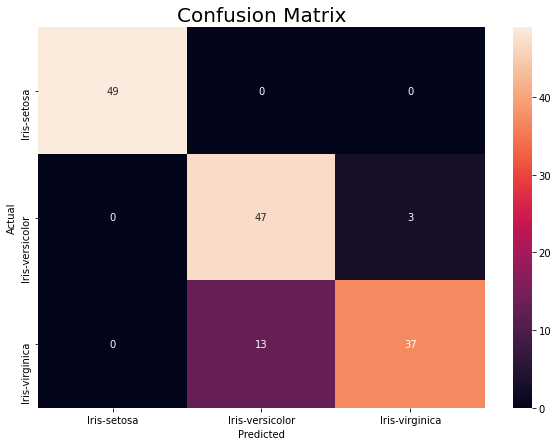

In [37]:
actual_data = list(actual_class)
y_actu = pd.Series(actual_data, name='Actual')
y_pred = pd.Series(final_guess, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix', fontsize = 20)
sn.heatmap(df_confusion, annot=True)
plt.show()

In [38]:
s_tp = 50
s_tn = 47+3+13+37
s_fp = 0
s_fn = 0
vc_tp = 47
vc_tn = 50+37
vc_fp = 13
vc_fn = 3
v_tp = 37
v_tn = 50+47
v_fp = 3
v_fn = 13

In [39]:
s_accuracy = 100*(s_tp+s_tn)/(150)
s_precision = s_tp/(s_fp + s_tp)
s_recall = s_tp/(s_fn + s_tp)
s_f1score = 2*s_precision*s_recall/(s_precision+s_recall)

vc_accuracy = 100*(vc_tp+vc_tn)/(150)
vc_precision = vc_tp/(vc_fp + vc_tp)
vc_recall = vc_tp/(vc_fn + vc_tp)
vc_f1score = 2*vc_precision*vc_recall/(vc_precision+vc_recall)

v_accuracy = 100*(v_tp+v_tn)/(150)
v_precision = v_tp/(v_fp + v_tp)
v_recall = v_tp/(v_fn + v_tp)
v_f1score = 2*vc_precision*vc_recall/(vc_precision+vc_recall)

In [40]:
# Printing the individual results
print("---------------------------")
print("Iris-setosa")
print()

print("Precision :", s_precision*100, "%")
print("Recall :", s_recall*100, "%")
print("f1score :", s_f1score)
print("---------------------------")
print()
print("Iris-versicolor")
print()

print("Precision :", vc_precision*100, "%")
print("Recall :", vc_recall*100, "%")
print("f1score :", vc_f1score)
print("---------------------------")
print()
print("Iris-virginica")
print()

print("Precision :", v_precision*100, "%")
print("Recall :", v_recall*100, "%")
print("f1score :", v_f1score)
print("---------------------------")

---------------------------
Iris-setosa

Precision : 100.0 %
Recall : 100.0 %
f1score : 1.0
---------------------------

Iris-versicolor

Precision : 78.33333333333333 %
Recall : 94.0 %
f1score : 0.8545454545454546
---------------------------

Iris-virginica

Precision : 92.5 %
Recall : 74.0 %
f1score : 0.8545454545454546
---------------------------


In [41]:
# Calculating the final accuracy
accuracy = (s_tp+vc_tp+v_tp)/150
print("Accuracy :", accuracy*100, "%")

Accuracy : 89.33333333333333 %
